# <center>Data Wrangling & Analyzing from Twitter</center>
**Farhan Mohammad**<br>
**December 2018**

In [21]:
# Import packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy 
import json
import requests
import re

# Gather

In [22]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [23]:
df.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [24]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
# Read in the file as a dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [25]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [26]:
consumer_key = 'faITem9SBu4jF5CP4qEjQ5AVI'
consumer_secret = 'qjKrJtvH8rOVY00cT418GwrjJUkMoTqlt5VBGVzr39dBprmCuf'
access_token = '805661335119798272-rGOvTjedu1Gwzt77JY7oPP0I3qMs6Lu'
access_secret = 'nhoWP8CR0qz11qjj1QTmvHBUJyTQ39R6GtKobh7Brlqby'

In [27]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [28]:
with open('tweet_json.txt', mode='w', encoding='utf8') as f:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 740
Rate limit reached. Sleeping for: 738


In [29]:
# For loop to append each tweet in a list
tweets_data = []

tweet_file = open('tweet_json.txt', mode='r')

for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
            
tweet_file.close()

In [30]:
# create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [31]:
tweets_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [32]:
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [33]:
tweet_info.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8321           38047
1  892177421306343426           6148           32668
2  891815181378084864           4068           24581
3  891689557279858688           8470           41406
4  891327558926688256           9163           39571

In [34]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


# Assess

In [35]:
# View top 10 rows of the twitter archive data
df.head(25)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   
20  2017-07-20 16:49:33 +0000   
21  2017-07-19 16:06:48 +0000   
22  2017-07-19 03:39:09 +0000   
23  2017-07-19 00:47:34 +0000   
24  2017-07-18 16:08:03 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   
20  <a href="http://twitter.com/download/iphone" r...   
21  <a href="http://twitter.com/download/iphone" r...   
22  <a href="http://twi

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [37]:
# View the top 10 rows of the image predictions data
image_predictions.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [38]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
# view the top 10 records of the tweet_info file
tweet_info.head(10)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8321           38047
1  892177421306343426           6148           32668
2  891815181378084864           4068           24581
3  891689557279858688           8470           41406
4  891327558926688256           9163           39571
5  891087950875897856           3049           19872
6  890971913173991426           2019           11618
7  890729181411237888          18465           64201
8  890609185150312448           4188           27313
9  890240255349198849           7219           31332

In [40]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [41]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [42]:
df['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Toby            7
an              7
Bailey          7
Daisy           7
Bella           6
Koda            6
Leo             6
Rusty           6
Oscar           6
Jax             6
Dave            6
Scout           6
Milo            6
Stanley         6
Jack            6
Sunny           5
             ... 
Tessa           1
Keet            1
Traviss         1
Gustav          1
Odin            1
Crawford        1
Timmy           1
Damon           1
Bobbay          1
space           1
Dot             1
Nida            1
Snoop           1
Kayla           1
Fiji            1
Horace          1
Caryl           1
Spark           1
Sonny           1
Shelby          1
Dante           1
Lucia           1
Vinscent        1
Durg            1
Crumpet   

In [43]:
df[df.duplicated() == True].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [44]:
image_predictions[image_predictions.duplicated() == True].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [45]:
tweet_info[tweet_info.duplicated() == True].count()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

# Quality
#### Completeness, Valdidity, Accuracy, Consistency
1. Includes retweeted status values which is not required. Only keep retweeted_status_id with values as NaN
2. Datatype for timestamp columns need to be changed from str(object) to datatime format
3. The name column has lot of incorrect or incomplete values. The name used most often is a
4. Several columns have empty values, such as in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
5. Replace URLs in the source column to the source text
6. Remove redundant data such as duplicated tweet_id and tweets with no pictures
7. Change the data type of ratings_numerator and ratings_denominator to float
8. The columns p1, p1_conf, p2, p2_conf etc can be categorized into a single column of dog breed

# Tidiness 
#### Structural issues (will be covered along with Quality fixes)
1. Similar data (tweet_id) in 3 different tables
2. Dog stages in multiple columns. It needs to be combined to a single dog stage variable

# Cleaning

### Define (Tidiness issue #1)
1. Similar data (tweet_id) in 3 different tables. Combine 3 tables with tweet_id.

### Code

In [46]:
df_clean = df.copy()
img_clean = image_predictions.copy()
tweets_clean = tweet_info.copy()

In [47]:
df_master = pd.merge(df_clean, img_clean, how='inner', on= ['tweet_id'])
df_master = pd.merge(df_master, tweet_info, how='inner', on=['tweet_id'])

#### Test

In [48]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
jpg_url                       2067 

### Define (Tidiness issue #2)
Create dog stage variable and remove individual dog stage columns.

### Code

In [49]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
#df_master['dog_stage'] = df_master['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
#lets condense the 'dog type' columns into one
dog_stage = []

string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df_master['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_stage.append(string_out[string_in.index(word)])
            break
    else:
        dog_stage.append('None')

df_master['dog_stage'] = dog_stage
df_master['dog_stage'].value_counts()

None       1682
pupper      247
doggo        73
floofer      35
puppo        30
Name: dog_stage, dtype: int64

Remove the inidividual columns for dog styles namely puppo, pupper, floofer, doggo

In [50]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_master = df_master.drop(columns, axis=1)

### Test

In [51]:
df_master.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls    ...      p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...    ...       False   
1  https://twitter.com/dog_rates/status/892177421...    ...        True   
2  https://twitter.com/dog_rates/status/891815181...    ...        True   
3  https://twitter.com/dog_rates/status/891689557...    ...       False   
4  https://twitter.com/dog_rates/status/891327558...    ...        True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

   p3_dog  retweet_count favorite_count  dog_stage  
0   False           8321          38047       None  
1    True           6148          32668       None  
2    True           4068          24581       None  
3   False           8470          41406       None  
4    True           9163          39571       None  

[5 rows x 27 columns]

In [52]:
df_master.dog_stage.value_counts()

None       1682
pupper      247
doggo        73
floofer      35
puppo        30
Name: dog_stage, dtype: int64

### Define
Datatype for timestamp columns need to be changed from str(object) to datatime format

### Code

In [53]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])

### Test

In [54]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non-null object
p1_conf                       2067 non-null float64
p1_dog                     

### Define
Includes retweeted status values which is not required. Only keep retweeted_status_id with values as NaN

### Code

In [55]:
df_master = df_master[pd.isnull(df_master.retweeted_status_id)]

### Test

In [56]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            1992 non-null object
p1_conf                       1992 non-null float64
p1_dog                        

### Define
Remove redundant data such as duplicated tweet_id, tweets with no pictures and columns in_reply_to_status_id, in_reply_to_user_id

### Code

In [57]:
# Delete duplicated tweet_id
df_master = df_master.drop_duplicates()

In [58]:
# Delete tweets with no pictures
df_master = df_master.dropna(subset = ['jpg_url'])

### Test

In [59]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            1992 non-null object
p1_conf                       1992 non-null float64
p1_dog                        

### Define
The name column has lot of incorrect or incomplete values. The name use most often is a

### Code

In [60]:
sum(df_master['name'] == 'None')

546

In [61]:
sum(df_master['name'] == 'a')

55

In [62]:
df_master.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          such
22        Canela
23          None
24          None
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
2037       quite
2038           a
2039        None
2040        None
2041        None
2042        None
2043        None
2044          an
2045           a
2046          an
2047        None
2048        None
2049        None
2050        None
2051        None
2052        None
2053        None
2054        None
2055        None
2056         the
2057         the
2058           a
2059           a
2060          an
2061           a
2062        None
2063           a
2064          

In [63]:
# We see all incorrect names have their first letter has lowercase. We will use this to change them into 'None'. 
names = []
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df_master.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df_master['names'] = names
df_master.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls    ...     \
0  https://twitter.com/dog_rates/status/892420643...    ...      
1  https://twitter.com/dog_rates/status/892177421...    ...      
2  https://twitter.com/dog_rates/status/891815181...    ...      
3  https://twitter.com/dog_rates/status/891689557...    ...      
4  https://twitter.com/dog_rates/status/891327558...    ...      

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  retweet_count  favorite_count dog_stage     names  
0  False           8321           38047      None   Phineas  
1   True           6148           32668      None     Tilly  
2   True           4068           24581      None    Archie  
3  False           8470           41406      None     Darla  
4   True           9163           39571      None  Franklin  

[5 rows x 28 columns]

### Test

In [64]:
df_master['names'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [65]:
# Finally assign the name column to names
df_master['name'] = df_master['names']

In [66]:
# drop the names column
df_master = df_master.drop('names', axis=1)

In [67]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      1992 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
jpg_url                       1992 non-null object
img_num                       1992 non-null int64
p1                            1992 non-null object
p1_conf                       1992 non-null float64
p1_dog                        

### Define
Several columns have empty values, such as in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code

In [68]:
# delete the columns related to replies from the master dataframe.
df_master = df_master.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)


# Delete columns related to retweet we don't need anymore
df_master = df_master.drop('retweeted_status_user_id', 1)
df_master = df_master.drop('retweeted_status_timestamp', 1)

# test
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'dog_stage']

### Test

In [69]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 23 columns):
tweet_id               1992 non-null int64
timestamp              1992 non-null datetime64[ns]
source                 1992 non-null object
text                   1992 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1992 non-null object
rating_numerator       1992 non-null int64
rating_denominator     1992 non-null int64
name                   1992 non-null object
jpg_url                1992 non-null object
img_num                1992 non-null int64
p1                     1992 non-null object
p1_conf                1992 non-null float64
p1_dog                 1992 non-null bool
p2                     1992 non-null object
p2_conf                1992 non-null float64
p2_dog                 1992 non-null bool
p3                     1992 non-null object
p3_conf                1992 non-null float64
p3_dog                 1992 non-null bool
retweet_count 

### Define
Display full content of 'text' column.

### Code

In [70]:
pd.set_option('display.max_colwidth', -1)

### Test

In [71]:
df_master.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  \
0 NaN                    
1 NaN                    
2 NaN                    
3 NaN                    
4 NaN                    

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name  \
0  13                10                  Phineas    
1  13                10                  Tilly      
2  12                10                  Archie     
3  13                10                  Darla      
4  12                10                  Franklin   

                                           jpg_url    ...      p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg    ...      False    
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg    ...      True     
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg    ...      True     
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg    ...      False    
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg    ...      True     

                   p2   p2_conf  p2_dog                           p3  \
0  bagel               0.085851  False   banana                        
1  Pekinese            0.090647  True    papillon                      
2  malamute            0.078253  True    kelpie                        
3  Labrador_retriever  0.168086  True    spatula                       
4  English_springer    0.225770  True    German_short-haired_pointer   

    p3_conf  p3_dog retweet_count  favo

### Define
Replace URLs in the source column to the source text

### Code

In [72]:
df_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [73]:
df_master['source'] = df_master['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
df_master['source'] = df_master['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
df_master['source'] = df_master['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')


### Test

In [74]:
df_master['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [75]:
df_master.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  \
0 NaN                    
1 NaN                    
2 NaN                    
3 NaN                    
4 NaN                    

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name  \
0  13                10                  Phineas    
1  13                10                  Tilly      
2  12                10                  Archie     
3  13                10                  Darla      
4  12                10                  Franklin   

                                           jpg_url    ...      p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg    ...      False    
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg    ...      True     
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg    ...      True     
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg    ...      False    
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg    ...      True     

                   p2   p2_conf  p2_dog                           p3  \
0  bagel               0.085851  False   banana                        
1  Pekinese            0.090647  True    papillon                      
2  malamute            0.078253  True    kelpie                        
3  Labrador_retriever  0.168086  True    spatula                       
4  English_springer    0.225770  True    German_short-haired_pointer   

    p3_conf  p3_dog retweet_count  favorite_count  dog_stage  
0  0.076110  False   8321          38047           None       
1  0.068957  True    6148          32668           None       
2  0.031379  True    4068          24581           None       
3  0.040836  False   8470          41406           None       
4  0.175219  True    9163          39571           None       

[5 rows x 23 columns]

### Define
Change the data type of ratings_numerator and ratings_denominator to float

### Code

In [76]:
df_master['rating_numerator'] = df_master['rating_numerator'].astype(float)
df_master['rating_denominator'] = df_master['rating_denominator'].astype(float)

### Test

In [77]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 23 columns):
tweet_id               1992 non-null int64
timestamp              1992 non-null datetime64[ns]
source                 1992 non-null object
text                   1992 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1992 non-null object
rating_numerator       1992 non-null float64
rating_denominator     1992 non-null float64
name                   1992 non-null object
jpg_url                1992 non-null object
img_num                1992 non-null int64
p1                     1992 non-null object
p1_conf                1992 non-null float64
p1_dog                 1992 non-null bool
p2                     1992 non-null object
p2_conf                1992 non-null float64
p2_dog                 1992 non-null bool
p3                     1992 non-null object
p3_conf                1992 non-null float64
p3_dog                 1992 non-null bool
retweet_co

### Define
Reducing the 3 columns that predict the Breed of the dog in the image to the most likely

### Code

In [78]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df_master.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df_master['breed'] = breed
df_master['confidence'] = confidence

In [79]:
df_master = df_master.drop(['img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

### Test

In [80]:
df_master.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  \
0 NaN                    
1 NaN                    
2 NaN                    
3 NaN                    
4 NaN                    

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name  \
0  13.0              10.0                Phineas    
1  13.0              10.0                Tilly      
2  12.0              10.0                Archie     
3  13.0              10.0                Darla      
4  12.0              10.0                Franklin   

                                           jpg_url  retweet_count  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  8321            
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  6148            
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  4068            
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  8470            
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  9163            

   favorite_count dog_stage               breed  confidence  
0  38047           None      Unknown             0.000000    
1  32668           None      Chihuahua           0.323581    
2  24581           None      Chihuahua           0.716012    
3  41406           None      Labrador_retriever  0.168086    
4  39571           None      basset              0.555712

# Analyze

In [81]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style of plots with seaborn
sns.set(style="darkgrid",font_scale=1.5)

In [82]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'retweet_count', 'favorite_count', 'dog_stage', 'breed',
       'confidence'],
      dtype='object')

In [83]:
df_master.describe()

tweet_id  retweeted_status_id  rating_numerator  \
count  1.992000e+03  0.0                  1992.000000        
mean   7.358697e+17 NaN                   12.282129          
std    6.749923e+16 NaN                   41.518523          
min    6.660209e+17 NaN                   0.000000           
25%    6.758399e+17 NaN                   10.000000          
50%    7.084748e+17 NaN                   11.000000          
75%    7.878678e+17 NaN                   12.000000          
max    8.924206e+17 NaN                   1776.000000        

       rating_denominator  retweet_count  favorite_count   confidence  
count  1992.000000         1992.000000    1992.000000     1992.000000  
mean   10.532631           2652.890060    8732.499498     0.464656     
std    7.324367            4729.465467    12806.656152    0.339419     
min    2.000000            12.000000      78.000000       0.000000     
25%    10.000000           592.000000     1874.750000     0.140339     
50%    10.000000           1274.000000    3950.000000     0.458209     
75%    10.000000           3035.750000    10876.750000    0.776359     
max    170.000000          83709.000000   164361.000000   0.999956

### Analysis: What is most popular dog breed in terms of the number of tweets?

In [84]:
df_master.breed.value_counts()

Unknown                           308
golden_retriever                  158
Labrador_retriever                108
Pembroke                          95 
Chihuahua                         91 
pug                               62 
toy_poodle                        51 
chow                              48 
Pomeranian                        42 
Samoyed                           41 
malamute                          33 
Chesapeake_Bay_retriever          31 
cocker_spaniel                    30 
French_bulldog                    30 
miniature_pinscher                25 
Eskimo_dog                        22 
Staffordshire_bullterrier         21 
German_shepherd                   21 
Cardigan                          21 
beagle                            20 
Siberian_husky                    20 
Shih-Tzu                          20 
Shetland_sheepdog                 19 
Maltese_dog                       19 
Rottweiler                        19 
kuvasz                            18 
Lakeland_ter

In [85]:
df_master.loc[df_master['breed'] == 'Unknown', 'breed'] = None

In [86]:
df_master.breed.count()

1684

In [87]:
df_master.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  \
0 NaN                    
1 NaN                    
2 NaN                    
3 NaN                    
4 NaN                    

                                                                                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                   
3  https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name  \
0  13.0              10.0                Phineas    
1  13.0              10.0                Tilly      
2  12.0              10.0                Archie     
3  13.0              10.0                Darla      
4  12.0              10.0                Franklin   

                                           jpg_url  retweet_count  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  8321            
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  6148            
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  4068            
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  8470            
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  9163            

   favorite_count dog_stage               breed  confidence  
0  38047           None      None                0.000000    
1  32668           None      Chihuahua           0.323581    
2  24581           None      Chihuahua           0.716012    
3  41406           None      Labrador_retriever  0.168086    
4  39571           None      basset              0.555712

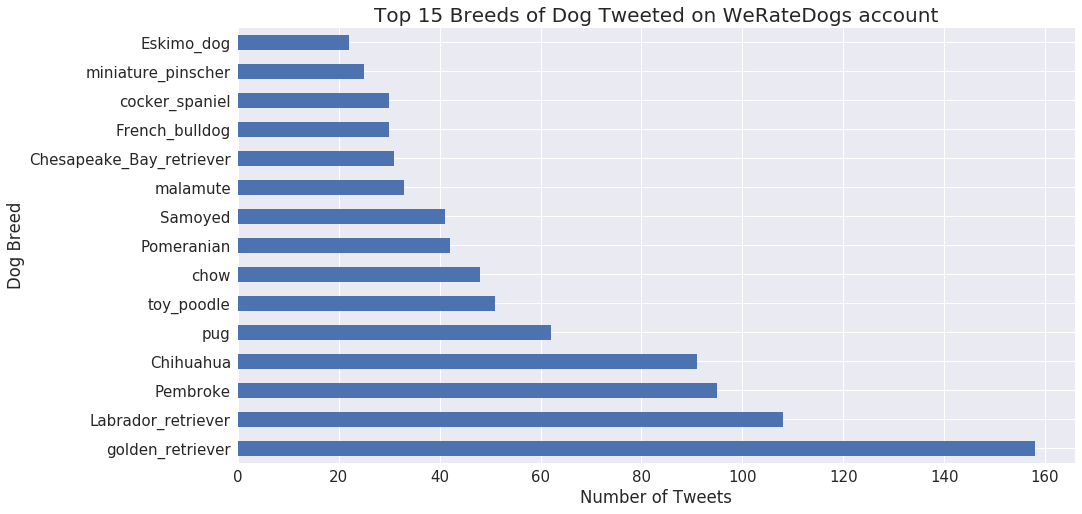

In [88]:
# Plot a horizontal bar chart to show top 15 breeds
fig = plt.figure(figsize=(15,8))
df_master.groupby('breed').count()['rating_numerator'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 15 Breeds of Dog Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets");

#### Insight: The most poplar dog breed in terms of the number of tweets is golden retriever

In [89]:
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)
df_master['dog_stage'] = df_master['dog_stage'].astype('category')

df_master = df_master.set_index('timestamp')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 14 columns):
tweet_id               1992 non-null object
source                 1992 non-null object
text                   1992 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1992 non-null object
rating_numerator       1992 non-null float64
rating_denominator     1992 non-null float64
name                   1992 non-null object
jpg_url                1992 non-null object
retweet_count          1992 non-null int64
favorite_count         1992 non-null int64
dog_stage              1992 non-null category
breed                  1684 non-null object
confidence             1992 non-null float64
dtypes: category(1), float64(4), int64(2), object(7)
memory usage: 220.0+ KB


In [90]:
df_master.columns

Index(['tweet_id', 'source', 'text', 'retweeted_status_id', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url',
       'retweet_count', 'favorite_count', 'dog_stage', 'breed', 'confidence'],
      dtype='object')

### Analysis: Plot the correlation map to see the relationship between our variables

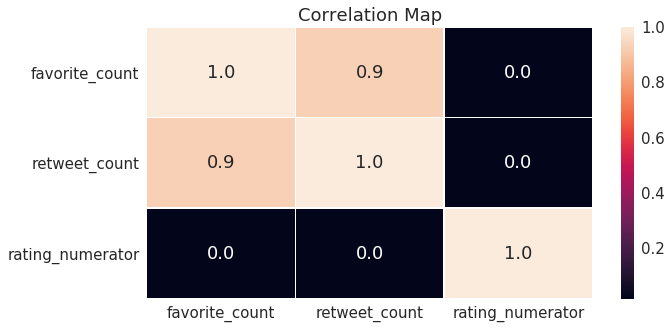

In [91]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_master[['favorite_count',
                       'retweet_count','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map');

There is a strong correlation between favourite_count and retweet_count which is expected.

### Analysis: Plot retweets and favourites over time

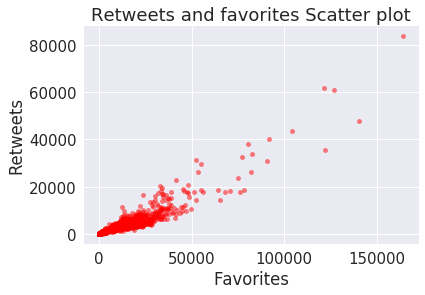

In [92]:
df_master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

The correlation map shows there is a linear relationship between retweet count and favourite count. The favourite count increases with an increase in the retweet count.

Text(0,0.5,'Rating')

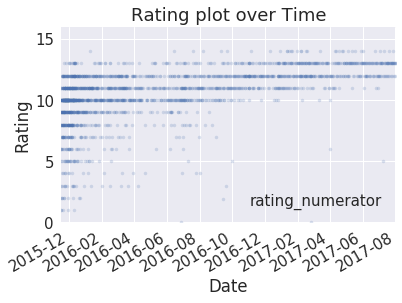

In [93]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df_master.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [94]:
df_master[df_master['rating_numerator'] <= 14]['rating_numerator'].describe()

count    1973.000000
mean     10.537760  
std      2.201147   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

#### Insights
1. More than 75% of the data has more than 12/10 as rating
2. The page start with small rating than they adopt the system of rating numerator more than the denominator

### Analysis: Plot famout dog stages

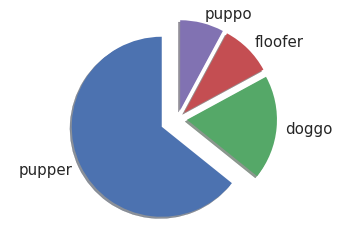

In [95]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots();
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90);
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

As we can see above, Pupper is a very famoust dog stage among others

In [96]:
# Saving the gathered, assessed, and cleaned master dataset to a CSV file.
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8') 

In [98]:
# save all the gathered data frames including the TSV file in the master file
df.to_csv('df.csv', encoding = 'utf-8') 
tweet_info.to_csv('tweet_info.csv', encoding = 'utf-8') 
image_predictions.to_csv('image_predictions.csv', encoding = 'utf-8') 